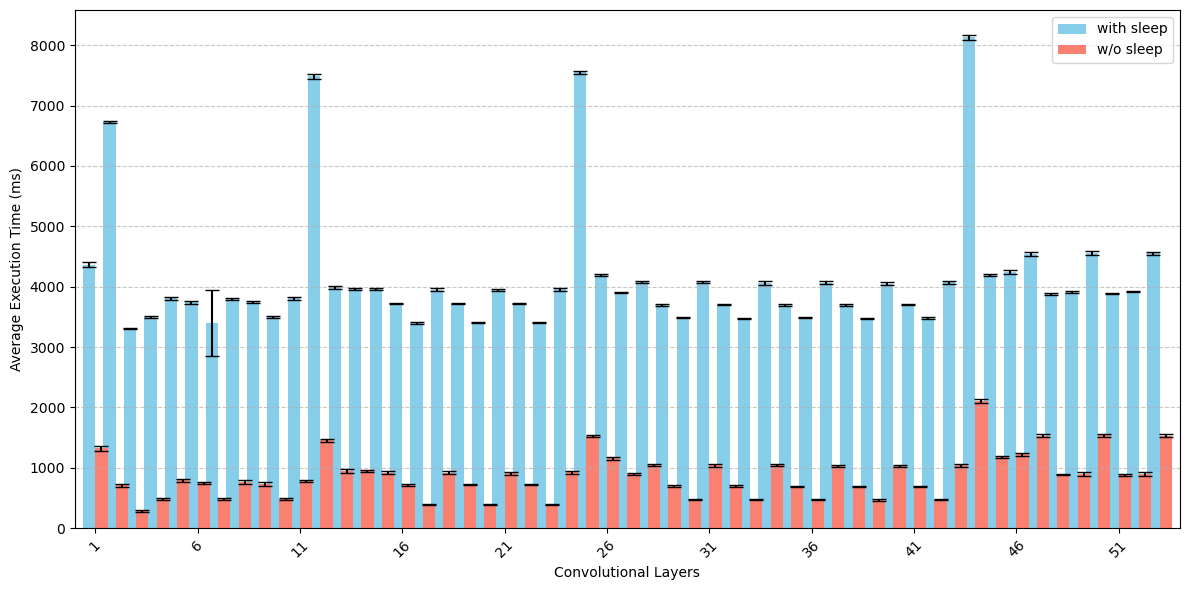

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load both datasets
data_sleep = pd.read_csv('/Users/tanjina/Desktop/New-readings/output-with-sleep-power-reading/client/analysis/per_layer_execution_time_sleep_3s_30_runs_transposed.csv') # with 3s sleep at the beginning & end
data_no_sleep = pd.read_csv('/Users/tanjina/Desktop/30runs-new/500Mbit-LAN/NEW/analysis/per_layer_execution_time_30_runs_transposed.csv') # without sleep

# Extract values

# Extract the specific columns from the dataset
conv_layers = data_sleep['Conv_layer#'].astype(int) # since, both datasets have same layers
execution_time_sleep = data_sleep['avg_execution_time_ms']
stdv_execution_time_sleep = data_sleep['stdv_execution_time_ms']

execution_time_no_sleep = data_no_sleep['avg_execution_time_ms']
stdv_execution_time_no_sleep = data_no_sleep['stdv_execution_time_ms']

# Set bar width and positions
bar_width = 0.6
# x = np.arange(len(layers))
x = conv_layers

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, execution_time_sleep, width=bar_width, color='skyblue', yerr=stdv_execution_time_sleep, capsize=5, label='with sleep')
plt.bar(x + bar_width/2, execution_time_no_sleep, width=bar_width, color='salmon', yerr=stdv_execution_time_no_sleep, capsize=5, label='w/o sleep')

# Add error value labels above bars
# for i in range(len(x)):
#     # For 'with sleep' bars
#     plt.text(x[i] - bar_width/2, execution_time_sleep[i] + stdv_execution_time_sleep[i] + 0.5,
#              f'{stdv_execution_time_sleep[i]:.2f}', ha='center', va='bottom', fontsize=8, color='blue')
    
#     # For 'without sleep' bars
#     plt.text(x[i] + bar_width/2, execution_time_no_sleep[i] + stdv_execution_time_no_sleep[i] + 0.5,
#              f'{stdv_execution_time_no_sleep[i]:.2f}', ha='center', va='bottom', fontsize=8, color='darkred')


plt.xlabel('Convolutional Layers')
plt.ylabel('Average Execution Time (ms)')
# plt.title('Execution Time per Convolutional Layer (Comparison)')
plt.xticks(x[::5], labels=conv_layers[::5], rotation=45) # reducing number of x-axis labels by displaying only every 5th layer, rotate layer names to  45 degree for readability
plt.xlim([x.min() - 1, x.max() + 1])
plt.gca().spines['left'].set_position(('data', 0)) # moves y-axis to x=0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
